In [1]:
from utils import loaders,model_fun
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.autograd import Variable
import torch
import numpy as np
#-------------------------------------Loader Building---------------------------------

train_set=loaders.CostumImFolder(["./data/anime/train_img/"],
                                 ["./data/anime/train_label/"])
train_loader=DataLoader(train_set, batch_size=8, shuffle=True)

print(train_set.transform)
print(train_set.target_transform)

#-------------------------------------Model Building---------------------------------
GPU_ID=[0]
   

img_1_1-checkpoint.png not imported
Compose(
    Resize(size=(512, 512), interpolation=PIL.Image.BILINEAR)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    Lambda()
)
None


In [2]:

torch.cuda.empty_cache()
big_model=model_fun.Pix2PixHDModel(28+1,3,GPU_ID)  
big_model.load_state_dict(torch.load("GAN_run19.pt"))
big_model.eval()

Pix2PixHDModel(
  (netG): GlobalGenerator(
    (model): Sequential(
      (0): ReflectionPad2d((3, 3, 3, 3))
      (1): Conv2d(29, 32, kernel_size=(7, 7), stride=(1, 1))
      (2): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (3): ReLU(inplace)
      (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (5): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (6): ReLU(inplace)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (8): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (9): ReLU(inplace)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (11): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (12): ReLU(inplace)
      (13): ResnetBlock(
        (conv_block): Sequential(
          (0): ReflectionPad2d((1, 1, 1, 1))
   

In [3]:
for in_img,tgt_stick,cc,dd in train_loader:
    break

In [4]:
torch.cuda.empty_cache()

_, out_img = big_model(Variable(tgt_stick).cuda(GPU_ID[0]), Variable(torch.tensor(0)).cuda(GPU_ID[0]), 
            Variable(in_img).cuda(GPU_ID[0]), Variable(torch.tensor(0)).cuda(GPU_ID[0]), infer=True)

In [6]:
out_img.shape

torch.Size([8, 3, 512, 512])

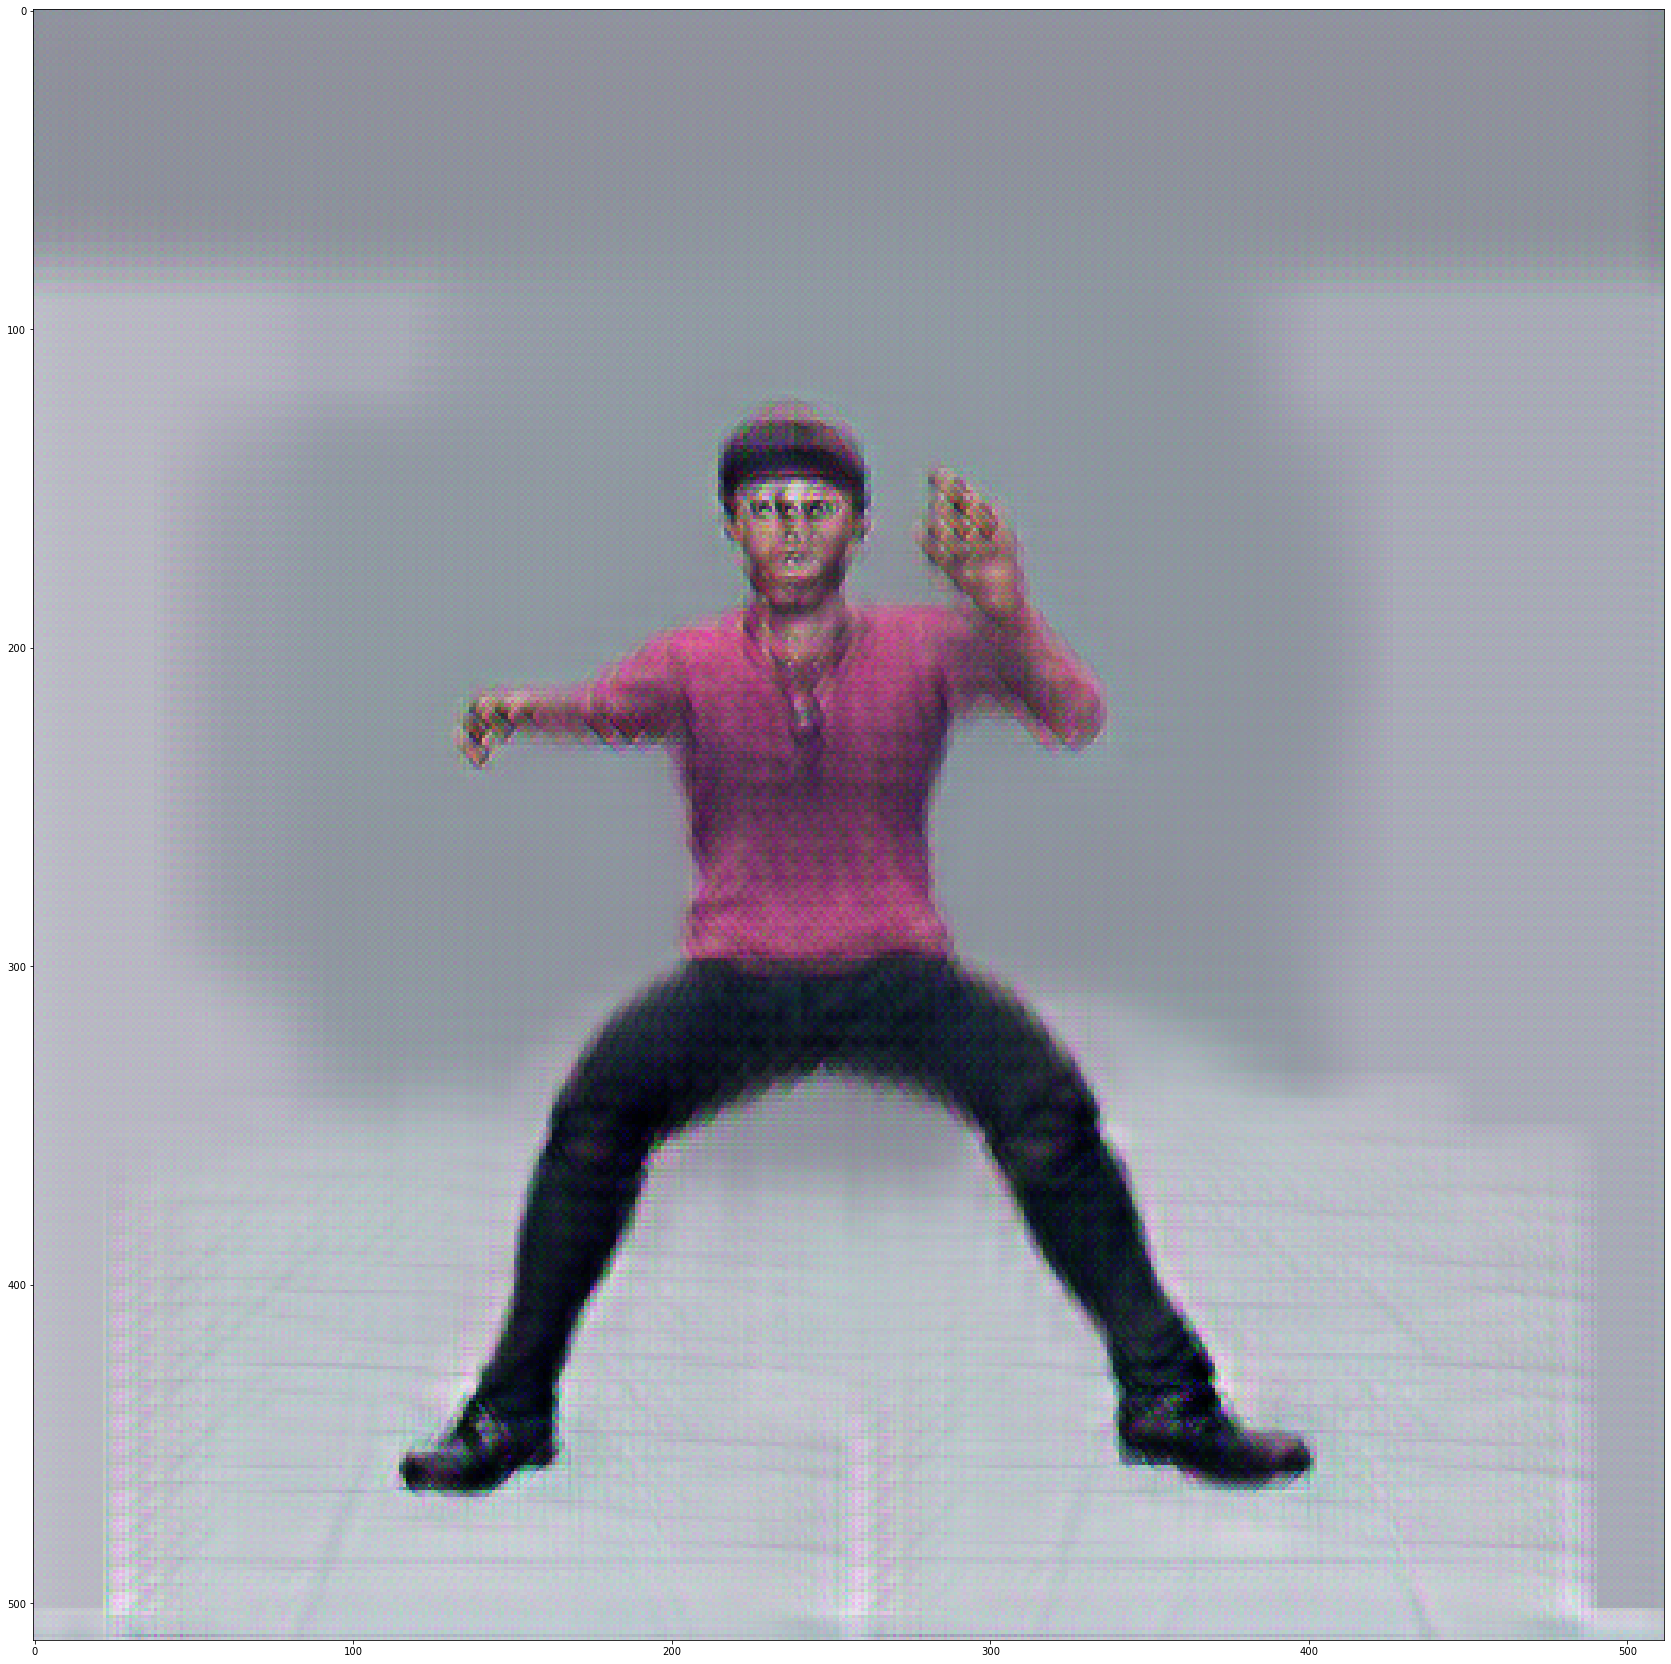

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(out_img.detach().cpu().numpy()[0,...].transpose(1,2,0))

In [2]:
for aa,bb,cc,dd in train_loader:
    break

In [64]:
EDG=get_edges(bb.cuda())

In [72]:
EDG[0].shape
C=EDG[0].detach().cpu().numpy().transpose(1,2,0)
C.shape

(256, 512, 3)

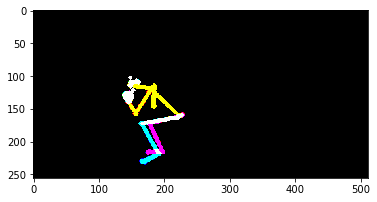

In [77]:
plt.imshow(EDG[0].detach().cpu().numpy().transpose(1,2,0))

In [62]:
import torch.nn as nn
LABEL_NC=0
DATA_TYPE=32
NO_INSTANCE=True
USE_FEATURES=True
LOAD_FEATURES=False
LABEL_FEAT=False
def get_edges(t):
        edge = torch.cuda.ByteTensor(t.size()).zero_()
        edge[:,:,:,1:] = edge[:,:,:,1:] | (t[:,:,:,1:] != t[:,:,:,:-1])
        edge[:,:,:,:-1] = edge[:,:,:,:-1] | (t[:,:,:,1:] != t[:,:,:,:-1])
        edge[:,:,1:,:] = edge[:,:,1:,:] | (t[:,:,1:,:] != t[:,:,:-1,:])
        edge[:,:,:-1,:] = edge[:,:,:-1,:] | (t[:,:,1:,:] != t[:,:,:-1,:])
        if DATA_TYPE==16:
            return edge.half()
        else:
            return edge.float()
        
def encode_input(label_map, inst_map=None, real_image=None, feat_map=None, infer=False):             
    if LABEL_NC == 0:
        input_label = label_map.data.cuda()
    else:
        # create one-hot vector for label map 
        size = label_map.size()
        oneHot_size = (size[0], LABEL_NC, size[2], size[3])
        input_label = torch.cuda.FloatTensor(torch.Size(oneHot_size)).zero_()
        input_label = input_label.scatter_(1, label_map.data.long().cuda(), 1.0)
        if DATA_TYPE == 16:
            input_label = input_label.half()

    # get edges from instance map
    if not NO_INSTANCE:
        inst_map = inst_map.data.cuda()
        edge_map = get_edges(inst_map)
        input_label = torch.cat((input_label, edge_map), dim=1)         
    input_label = Variable(input_label, volatile=infer)

    # real images for training
    if real_image is not None:
        real_image = Variable(real_image.data.cuda())

    # instance map for feature encoding
    if USE_FEATURES:
        # get precomputed feature maps
        if LOAD_FEATURES:
            feat_map = Variable(feat_map.data.cuda())
        if LABEL_FEAT:
            inst_map = label_map.cuda()

    return input_label, inst_map, real_image, feat_map

In [41]:
input_label, inst_map, real_image, feat_map=encode_input(bb.sum(1).unsqueeze(1))

RuntimeError: CUDA error: device-side assert triggered

In [5]:
print(bb.shape)
print(bb.max(),bb.min())

torch.Size([10, 3, 256, 512])
tensor(255.) tensor(0.)


In [19]:
cc=bb.max(1).values.unsqueeze(1)

In [20]:
cc.shape

torch.Size([10, 1, 256, 512])

In [4]:
B=bb.view(10,3,256*512)

In [11]:
B=bb.detach().transpose(1,3).contiguous().view(10*256*512,3).numpy().copy()
print(B.shape)
print(B.max())

(1310720, 3)
255.0


In [12]:
import numpy as np
V=(B!=255).any(1)
M=np.intc(B[V,:])
M.shape

(25023, 3)

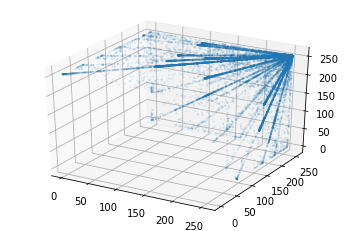

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Axes3D.scatter(ax,xs=M[:,0],ys= M[:,1], zs=M[:,2],alpha=0.1,s=1)

In [57]:
import numpy as np
M=np.intc(np.sort(M,axis=0))

In [38]:
cc.shape

(256, 512, 3)

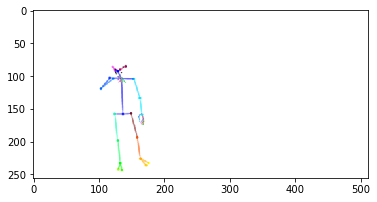

In [3]:
cc=bb[0,...].detach().numpy().copy().transpose(1,2,0)

plt.imshow(np.intc(cc))

In [8]:
bb.max(1).values.shape

torch.Size([10, 256, 512])

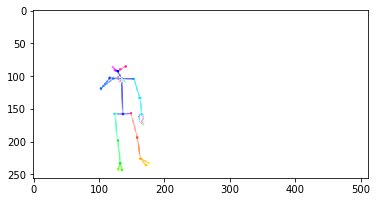

In [10]:
dd=(bb/(bb.max(1).values).unsqueeze(1))[0].detach().numpy().copy().transpose(1,2,0)
plt.imshow(dd)

NameError: name 'input_label' is not defined

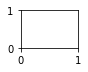

In [32]:
for ii in range(21):
    plt.subplot(5,5,ii+1)
    plt.imshow(input_label[0,ii,...].detach().cpu())